In [1]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load both train and test datasets
train= pd.read_csv(r"E:\evaluation\p10\train_agriculture.csv")
test= pd.read_csv(r"E:\evaluation\p10\test_agriculture.csv")

In [3]:
#Check the number of rows and columns in train dataset
train.shape


(4599, 10)

In [4]:
#Check the number of rows and columns in test dataset
test.shape

(1199, 9)

In [5]:
#Lets check the first 5 records of train dataset
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
#check for the nul values and datatype
train.info()
#Observations: Number of weeks used has missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
#Observations: Total 442 records of Number weeks used is found missing values 
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [8]:
#Observations: Total 119 records of Number weeks used is found missing values in test dataset
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [10]:
#Lets check the counts of different Columns 
train['Crop_Type'].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [11]:
train['Season'].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [12]:
train['Pesticide_Use_Category'].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [14]:
train['Soil_Type'].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [13]:
#Checking the correlation in the given data
train.corr()
#observations
#1.Crop damage VS Estimated insect count
#2.Crop type VS Pesticide used category
#3.Pesticide used category VS Number of weeks used
#4.Estimated insect count VS Number of weeks used

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


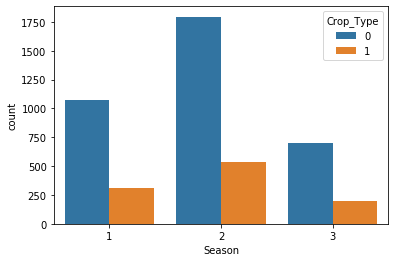

In [15]:
#Start with Visualization on train dataset
sns.countplot(x='Season',data=train,hue='Crop_Type')

Observations
1. Crop Type 0 is produced more in all 3 seasons as compared to other seasons.
2. Out of all seasons crop type 1 is produced more in season 2 

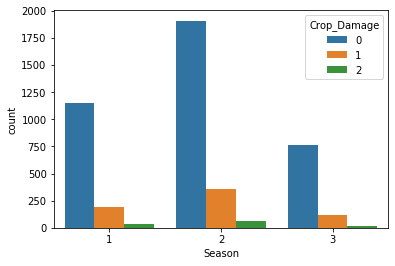

In [16]:
#Visualization on train dataset
sns.countplot(x='Season',data=train,hue='Crop_Damage')

Observation 
1. Most of the crops are alive in all 3 seasons
2. Crops damaged due to pesticide is max in season 2 
3. Crops damaged due to other reasons maximum can be seen in season 2 
4. Season 2 is most favourable for Crops as most of the crops are alive as compared to other seasons


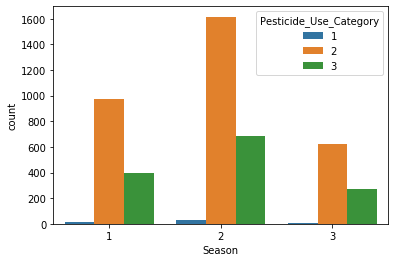

In [19]:
#Visualization on train dataset
sns.countplot(x='Season',data=train,hue='Pesticide_Use_Category')

Observation
1. Never used Pesticides are least utilized in season3 and season 1 
2. Previous used pesticides are utilized maximum is season 2 
3. Current used pesticide are utilized maximum in season 2

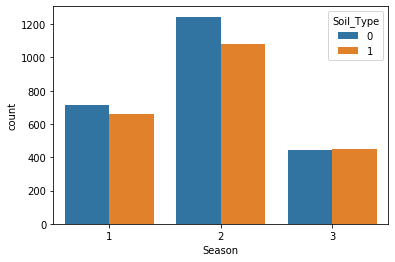

In [20]:
#Visualization on train dataset
sns.countplot(x='Season',data=train,hue='Soil_Type')

Observation
1. Soil of category 0 is used max in season 2 
2. Soil of category 1 is used max in season 2

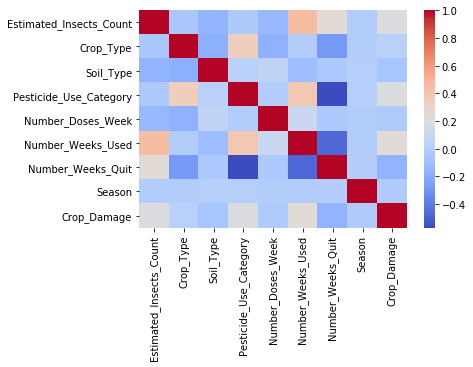

In [21]:
#Lets check the correlation in heatmape format 
sns.heatmap(train.corr(),cmap='coolwarm')

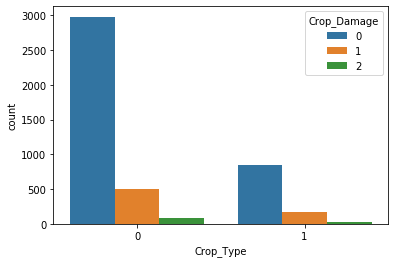

In [24]:
#Visualization on train dataset on crop damage and crop type
sns.countplot(x='Crop_Type',data=train,hue='Crop_Damage')

Observations 
1. Category 0 crops is most alive 
2. Crops damaged due to other causes is maximum for category 0
3. Crops damaged due to Pesticides is maximum for category 0

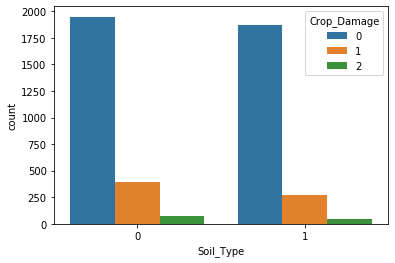

In [25]:
#Visualization on train dataset on crop damage and crop type
sns.countplot(x='Soil_Type',data=train,hue='Crop_Damage')
#oberservation : In Soil category 0 crop is most damaged due to other reasons 

In [38]:
train.drop('ID',axis=1,inplace=True)

In [39]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [43]:
train.drop('Number_Weeks_Used',axis=1,inplace=True)

In [46]:
train.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,1,0
1,209,1,0,1,0,0,2,1
2,257,1,0,1,0,0,2,1
3,257,1,1,1,0,0,2,1
4,342,1,0,1,0,0,2,1


In [47]:
train.drop('Estimated_Insects_Count',axis=1,inplace=True)

In [48]:
X_train3 = train.drop('Crop_Damage',axis = 1)
y_train3 = train['Crop_Damage']
X_test3 = test

In [49]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

ValueError: could not convert string to float: 'F00000002'